# Mimir: A Holistic Error Correction System

This notebook demonstrates how figures for our publication "Mimir: A Holistic Error Correction System" are generates from the raw measurements.
You cannot repeat any measurements in this notebook, please refer to the `infrastructure/` directory for that purpose.

In [1]:
import plots
from matplotlib import pyplot as plt
import matplotlib 

In [2]:
font_path = '/Users/philipp/Library/Fonts/LinLibertine_R.otf'
matplotlib.rcParams.update({
    'font.family': 'Linux Libertine O',
    'mathtext.fontset': 'custom',
    'mathtext.it': 'Linux Libertine O:italic',
    'mathtext.rm': 'Linux Libertine O'
})

# Table: Comparison With Competitors

In [21]:
df_empty_run = (plots.performance_table('measurements/global-performance/2023-12-26-mimir/',
                        'measurements/global-performance/2023-12-01-baran-baseline/',
                        '2023-12-01-baseline-baran-vs-mirmir',
                        'measurements/global-performance/2023-12-01-garf-baseline/',
                        'measurements/global-performance/2023-12-01-holoclean-baseline/')[0]
.sort_values('normalized_dataset', ascending=True)
.loc[:, ['Mimir', 'Baran', 'HoloClean', 'Garf']])
df_empty_run

Loaded Mimir Results. 0/120 measurements failed.


ensemble,Mimir,Baran,HoloClean,Garf
normalized_dataset,,,,
137 5%,0.71,0.58,NaN,NaN
137 cat 5%,0.85,0.55,NaN,NaN
1481 5%,0.67,0.53,0.25,NaN
1481 cat 5%,1.00,1.00,1.00,NaN
151 5%,0.88,0.86,0.69,NaN
151 cat 5%,1.00,0.75,0.95,NaN
184 5%,0.72,0.58,0.39,NaN
184 cat 5%,1.00,1.00,1.00,NaN
41027 5%,0.69,0.51,0.46,NaN


In [6]:
print(f"Mimir < Baran: {len(df_empty_run[(df_empty_run['Mimir'] + 0.03) < df_empty_run['Baran']])} datasets")
print(f"Mimir > Baran: {len(df_empty_run[df_empty_run['Mimir'] > (df_empty_run['Baran'] + 0.03)])} datasets")
print(f"Mimir avg: {df_empty_run['Mimir'].mean()}")
print(f"Baran avg: {df_empty_run['Baran'].mean()}")

Mimir < Baran: 1 datasets
Mimir > Baran: 21 datasets
Mimir avg: 0.8173076923076923
Baran avg: 0.6719230769230768


# Mimir vs Baran

Loaded Mimir Results. 0/120 measurements failed.


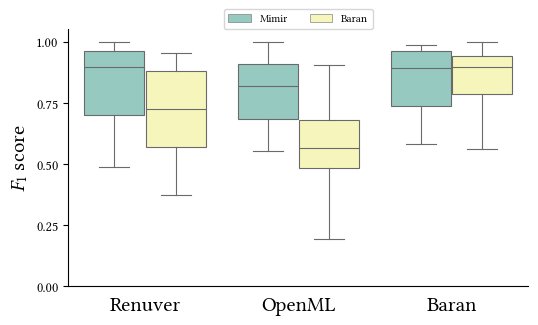

In [20]:
fig, axes, df, failed_measurements = plots.plot_mirmir_vs_baran('measurements/global-performance/2023-12-26-mimir/',
                           'measurements/global-performance/2023-12-01-baran-baseline/',
                           '2023-12-01-baseline-baran-vs-mirmir')
plt.savefig('./img/2023-12-21-mirmir-vs-baran.pdf', bbox_inches='tight')
#plt.tight_layout()
#plt.show()

In [8]:
df.loc[:, ['ensemble', 'F1 Score']].groupby(['ensemble']).agg({'F1 Score': ['mean', 'std']})

F1 Score          
             mean       std
ensemble                   
Baran     0.67167  0.226359
Mimir     0.81723  0.149958

In [9]:
df.loc[:, ['dataset_group', 'ensemble', 'F1 Score']].groupby(['ensemble', 'dataset_group']).agg({'F1 Score': ['mean', 'std']})

F1 Score          
                            mean       std
ensemble dataset_group                    
Baran    Baran          0.837892  0.169566
         OpenML         0.604497  0.233737
         Renuver        0.706111  0.191060
Mimir    Baran          0.834497  0.156800
         OpenML         0.806844  0.141843
         Renuver        0.826773  0.164964

# ET_CorrFM vs Value Models

Loaded Mimir Results. 0/480 measurements failed.


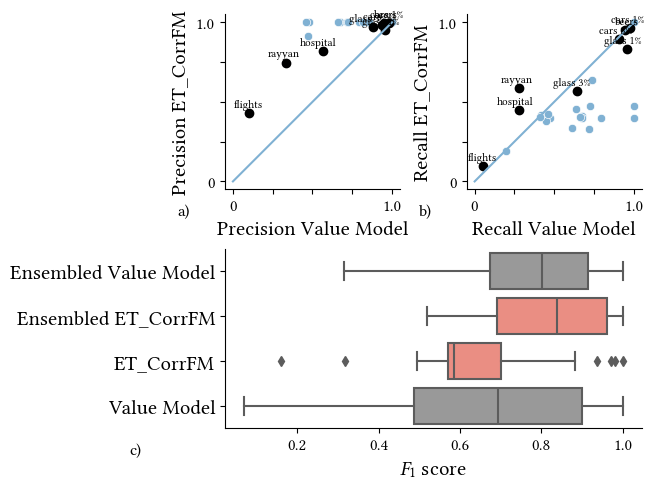

In [19]:
fig, axes, df_scatter = plots.et_corrfm_vs_value_model_v2('measurements/et_corfm-vs-value/')
plt.show()
#plt.savefig('./img/2023-12-21-scatter-et_corrfm-vs-value_model.pdf', bbox_inches='tight')

# SC_Phodi vs Vicinity Model

Loaded Mimir Results. 0/480 measurements failed.


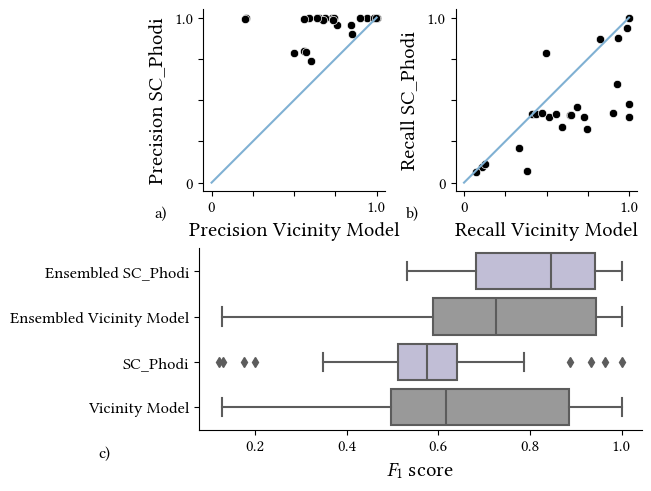

In [18]:
fig, axes, failed = plots.sc_phodi_vs_vicinity_model('measurements/phodi-vs-vicinity/')
plt.show()
#plt.savefig('./img/2023-12-21-phodi-vs-vicinity.pdf', bbox_inches='tight')

# Global Ablation Barchart

Loaded Ablation Study. 0/1080 measurements failed.


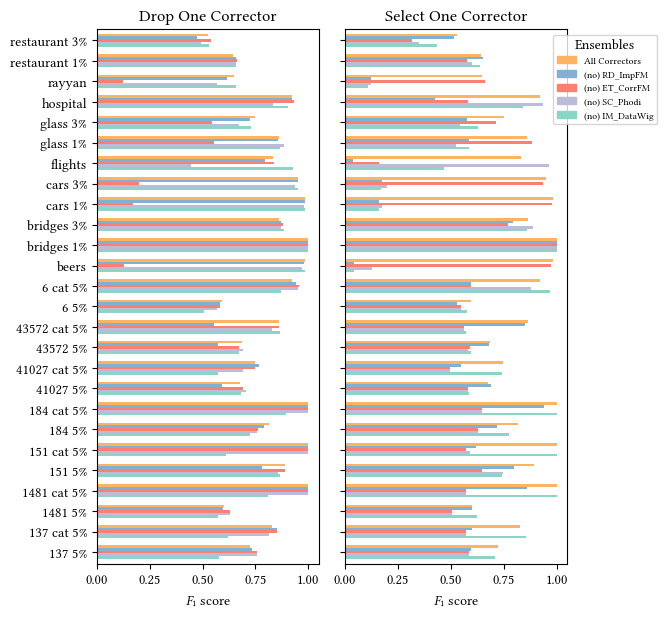

In [17]:
fig, axes, failed = plots.plot_global_ablation_study('measurements/ablation-study/')
plt.show()
#plt.savefig('./img/2023-12-21-global-ablation-study.pdf', bbox_inches='tight')

# Global Ablation Scatter

Loaded Mimir Results. 0/1080 measurements failed.


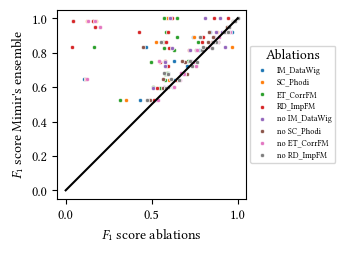

In [16]:
fig, axes, failed_measurements = plots.ablation_scatter('measurements/ablation-study/')
plt.show()
#plt.savefig('./img/2023-12-21-global-ablation-study-scatter.pdf', bbox_inches='tight')

# Local Ablation Barchart

Loaded Ablation Study. 0/1080 measurements failed.


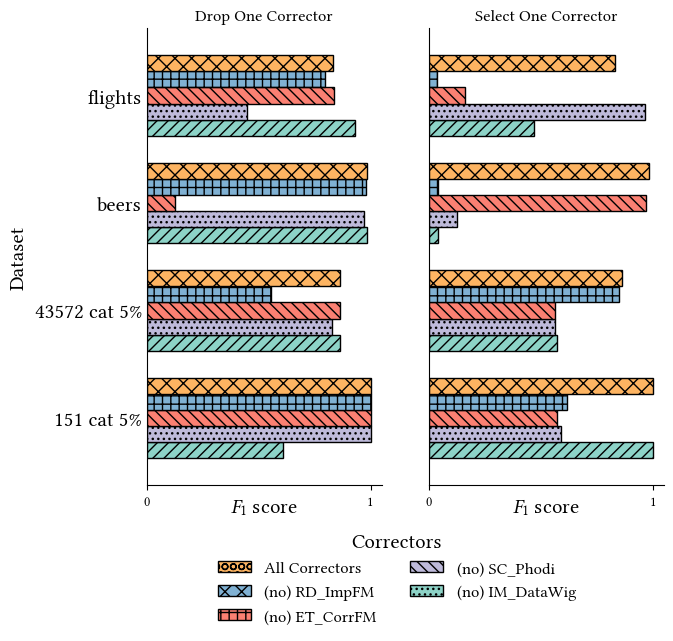

In [15]:
fig, axes, failed = plots.plot_local_ablation_study('measurements/ablation-study/')
plt.savefig('./img/2023-12-21-local-ablation-study.pdf', bbox_inches='tight')
plt.show()
#plt.tight_layout()
#plt.show()